In [42]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from math import *
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import knn as knn
from scipy import integrate
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib


In [64]:
def integrand(i, x, y, sigma2):
    outer = exp(-((y-sin(i))**2+(x-cos(i))**2)/(2*sigma2))
    inner = exp(-((y-(0.5-sin(i)))**2+(x-(1-cos(i)))**2)/(2*sigma2))  
    return outer - inner

x = np.arange(-2, 3, 0.01)
y = np.arange(-1.5, 2, 0.01)
X,Y = meshgrid(x, y)
def integrate_on_grid(func, lo, hi, *args):
    """Returns a callable that can be evaluated on a grid."""
    return np.vectorize(lambda n,m: integrate.quad(func, lo, hi, (n,m)+args)[0])

Z = integrate_on_grid(integrand, 0, np.pi, 0.25)(X,Y)


In [43]:
def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)


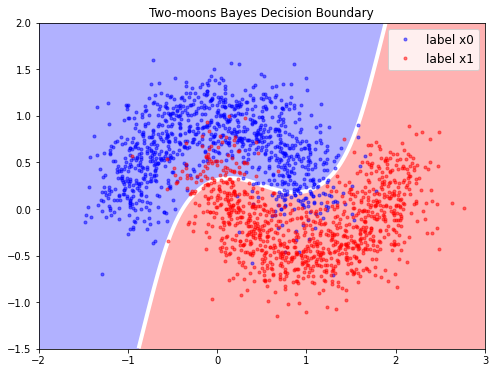

In [105]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.contourf(Z, 0, alpha=0.6, cmap = "bwr_r", extent=(-2,3,-1.5,2))
X, y = knn.generate_two_moon(2000, 0.25)
ax.plot(X[y == 0][:, 0], X[y == 0][:, 1], '.',
        alpha=0.5, label='label x0', color='blue')
ax.plot(X[y == 1][:, 0], X[y == 1][:, 1], '.',
        alpha=0.5, label='label x1', color='red')
ax.set_title(title)
ax.legend(fontsize=12)

contour(Z,0,linewidths=4,colors='w', origin='lower', extent=(-2,3,-1.5,2)) #cmap=cm.Set2, 
title('Two-moons Bayes Decision Boundary')
show()

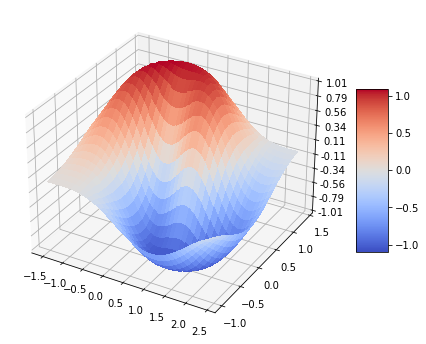

In [15]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,6))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()